In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
plt.rcParams['figure.figsize'] = [16, 9]

## Example 1: Decision tree for "go by bike"

In [9]:
df_rad = pd.DataFrame({"Sunny": ["yes", "no", "no", "no", "yes", "no", "yes", "yes", "yes"],
                   "Snow": ["no", "no", "no", "no", "no", "no", "no", "yes", "yes"],
                   "Car broken down": ["no", "no", "yes", "no", "yes", "yes", "no", "no", "yes"],
                   "Start 8:00": ["no", "no", "no", "no", "no", "yes", "yes", "no", "no"],
                   "Bike": ["yes", "no", "yes", "no", "yes", "yes", "no", "no", "no"]})

Mean accuracy=1.0
Sunny 0.09582771325373216
Snow 0.5880378925029466
Car broken down 0.2315027574515237
Start 8:00 0.0846316367917976


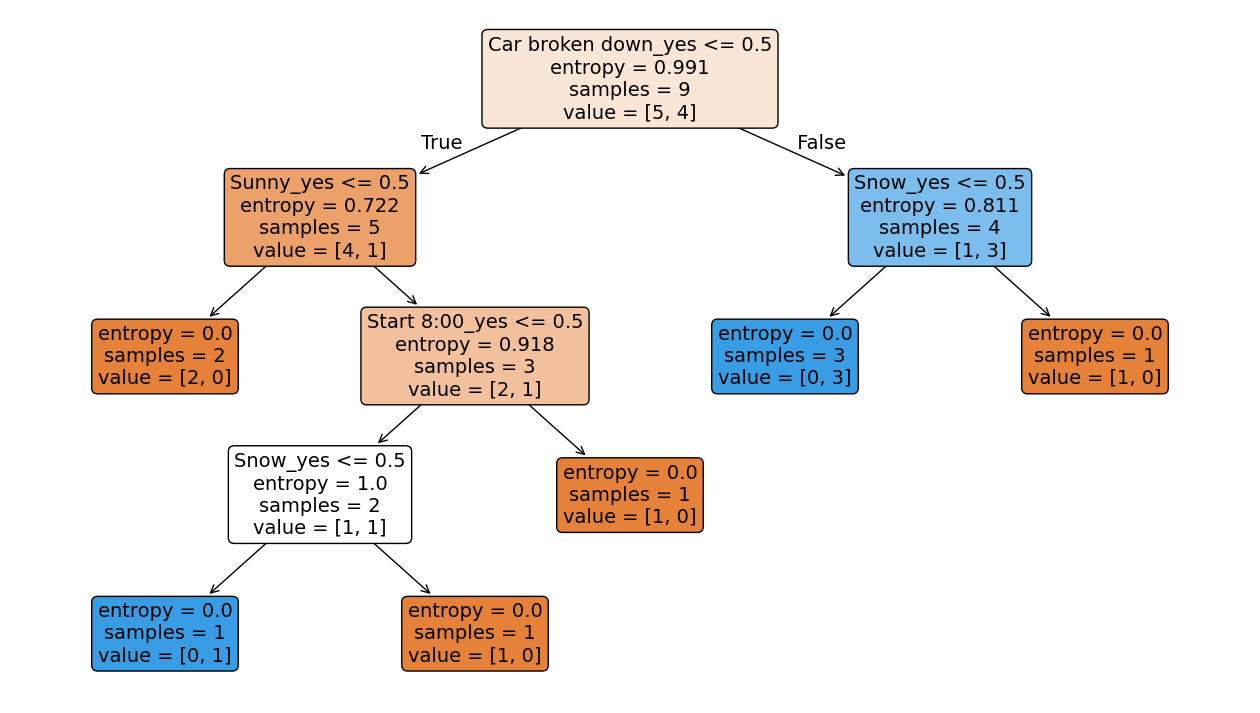

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Unfortunately, you have to encode the categorical features one-hot, because sklearn wants it that way.
X = pd.get_dummies(df_rad[["Sunny", "Snow", "Car broken down", "Start 8:00"]], drop_first=True)
y = pd.get_dummies(df_rad["Bike"], drop_first=True)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion="entropy")

tree_clf.fit(X, y)

plot_tree(tree_clf, feature_names=X.columns, rounded=True, filled=True, fontsize=14)

print(f"Mean accuracy={tree_clf.score(X, y)}")

for name, score in zip(["Sunny", "Snow", "Car broken down", "Start 8:00"], tree_clf.feature_importances_):
    print(name, score)

## Example 2: Decision tree and random forest for the Iris data set
Here, the random forest offers no additional performance gain, as the decision tree already provides a perfect prediction (on the test set).

Feature importance decision tree
sepal length (cm) 0.0
sepal width (cm) 0.0
petal length (cm) 0.9346263239452668
petal width (cm) 0.06537367605473333
Feature importance random forest
sepal length (cm) 0.09611534241554193
sepal width (cm) 0.03111793574125188
petal length (cm) 0.45956594120906974
petal width (cm) 0.4132007806341365
Accuracy Decision Tree:1.0
Accuracy Random Forest:1.0


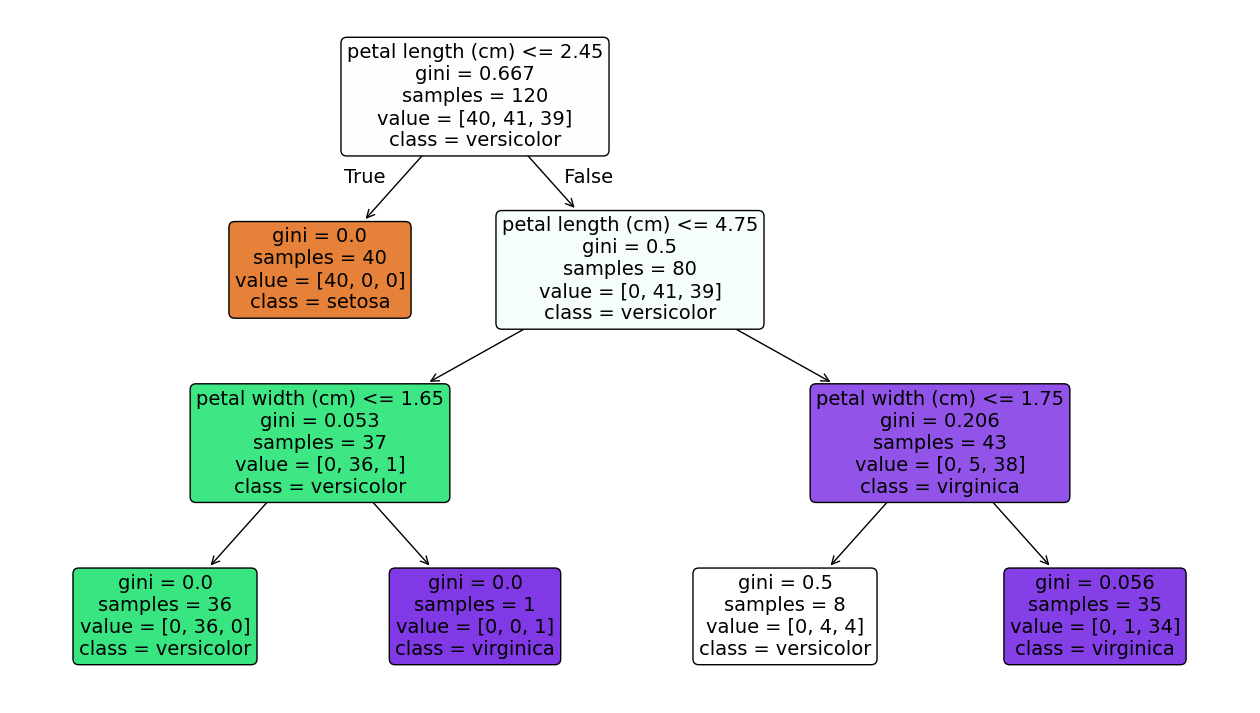

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

plot_tree(tree_clf,rounded=True, filled=True, fontsize=14,
          class_names=iris.target_names, feature_names=iris.feature_names)

print("Feature importance decision tree")
for name, score in zip(iris.feature_names, tree_clf.feature_importances_):
    print(name, score)



rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print("Feature importance random forest")
for name, score in zip(iris.feature_names, rf_clf.feature_importances_):
    print(name, score)


print(f"Accuracy Decision Tree:{accuracy_score(y_test, tree_clf.predict(X_test))}")
print(f"Accuracy Random Forest:{accuracy_score(y_test, rf_clf.predict(X_test))}")

